In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [138]:
def CalculateFontsize(xlim, ylim, fig, rows, cols, unit_scale=1):
    # Get axis limits
    #xlim = ax.get_xlim()
    #ylim = ax.get_ylim()

    # Get figure dimensions in pixels
    fig_width, fig_height = fig.get_size_inches() * fig.dpi

    # Get axis dimensions in pixels
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    ax_width, ax_height = bbox.width * fig.dpi, bbox.height * fig.dpi

    # Calculate font size proportional to axis units
    fontsize_x = unit_scale * ax_width / (xlim[1] - xlim[0]) / cols
    fontsize_y = unit_scale * ax_height / (ylim[1] - ylim[0]) / rows

    # Use the minimum of the two to keep the font size consistent
    fontsize = min(fontsize_x, fontsize_y)

    return fontsize

In [139]:
def DrawMSA(msa, axlim = None, color_order = None, palette=None, ax=None, fig=None):
    # Get the canvas attributes.
    ax = ax or plt.gca()
    
    fig = fig or ax.get_figure()
    renderer = fig.canvas.get_renderer()
    
    height = len(msa)
    length = len(msa[0])
    
    if (axlim == None):
        fontsize = CalculateFontsize(ax.get_xlim(), ax.get_ylim(), fig, height, length)
    else:
        fontsize = CalculateFontsize(axlim[0], axlim[1], fig, height, length)
    chrColor = {}
    
    if color_order == None:
        for a in msa:
            for c in a:
                if c not in chrColor:
                    size = len(chrColor)
                    chrColor[c] = sns.color_palette(palette)[size]
    else:
        for i,c in enumerate(color_order):
            chrColor[c] = sns.color_palette(palette)[i]
    
    for i, a in enumerate(msa):
        for j,c in enumerate(a):
            ax.text(x=j/length+0.5/length, y=i/height, s=c, color="white",
                va="bottom", ha="center", fontsize=fontsize,
                transform=ax.transAxes if axlim else ax.transData)
            
            ax.add_patch( patches.Rectangle(xy=(j/length, i/height),
                                           width = 1/length, height=1/height,
                                          facecolor=chrColor[c], linewidth=fontsize/50, edgecolor="white",
                                          transform=ax.transAxes if axlim else ax.transData))
            
    #ax.set_xlim(0, len(msa[0]))
    #ax.set_ylim(-0.5, len(msa) - 0.5)
    ax.set_axis_off()
    return ax

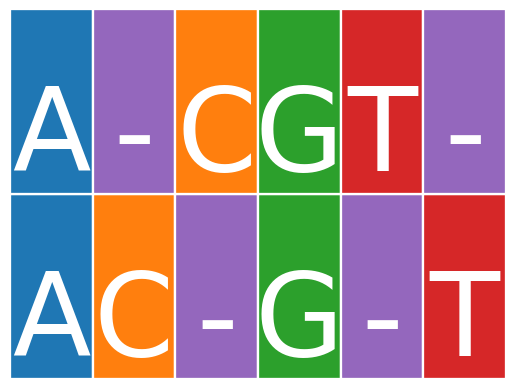

In [140]:
ax=DrawMSA(msa=["AC-G-T", "A-CGT-"], color_order="ACGT-")